In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-09-42-07.csv")
results['datetime'] = pd.to_datetime(results['datetime'], errors='coerce')
results

,Unnamed: 0,datetime,charge_solar,charge_load,discharge_size,current_solar,current_controlled_load_consumption,current_general_electricity_consumption,current_charge
0,0,2012-01-08 00:30:00,0.964156,0.051686,0.799519,0.0,1.250,0.109,0.000000
1,1,2012-01-08 01:00:00,0.344096,0.045368,0.770075,0.0,1.238,0.299,0.000000
2,2,2012-01-08 01:30:00,0.603504,0.009909,0.943784,0.0,1.256,0.375,0.000000
3,3,2012-01-08 02:00:00,0.516807,0.458639,0.926331,0.0,1.150,0.978,0.000000
4,4,2012-01-08 02:30:00,0.025345,0.629966,0.949924,0.0,0.131,1.027,0.000000
...,...,...,...,...,...,...,...,...,...
234,234,2012-01-12 21:30:00,0.358476,0.230617,0.947423,0.0,0.000,0.290,0.672722
235,235,2012-01-12 22:00:00,0.760259,0.530479,0.772793,0.0,0.000,0.284,0.840077
236,236,2012-01-12 22:30:00,0.445007,0.405212,0.846291,0.0,0.000,0.283,0.631634
237,237,2012-01-12 23:00:00,0.540624,0.510819,0.759040,0.0,0.000,0.874,0.351913


In [28]:
results_long = results.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime"])
results_long

,datetime,variable,value
0,2012-01-08 00:30:00,charge_solar,0.964156
1,2012-01-08 01:00:00,charge_solar,0.344096
2,2012-01-08 01:30:00,charge_solar,0.603504
3,2012-01-08 02:00:00,charge_solar,0.516807
4,2012-01-08 02:30:00,charge_solar,0.025345
...,...,...,...
1668,2012-01-12 21:30:00,current_charge,0.672722
1669,2012-01-12 22:00:00,current_charge,0.840077
1670,2012-01-12 22:30:00,current_charge,0.631634
1671,2012-01-12 23:00:00,current_charge,0.351913


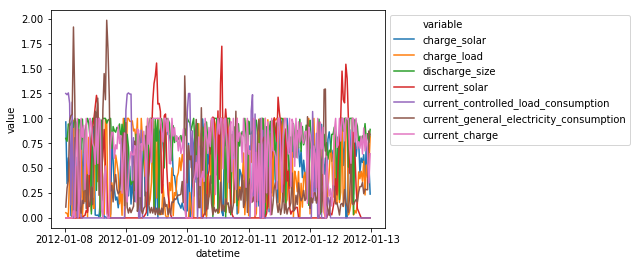

In [29]:
sns.lineplot(data=results_long, x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

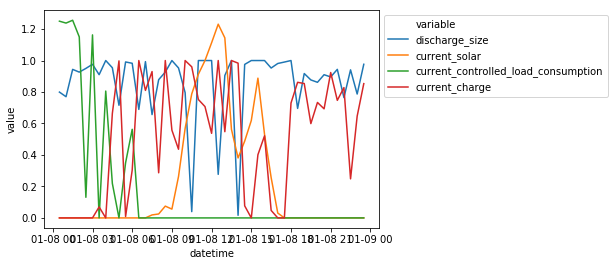

In [30]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "discharge_size","current_controlled_load_consumption"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-09"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

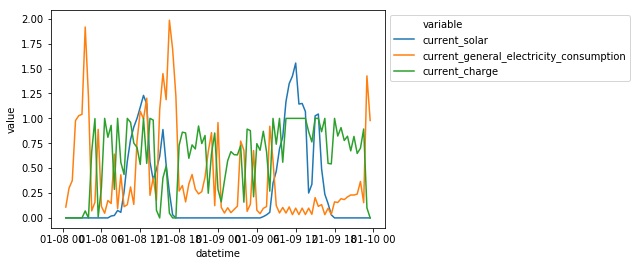

In [31]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "current_general_electricity_consumption"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-10"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

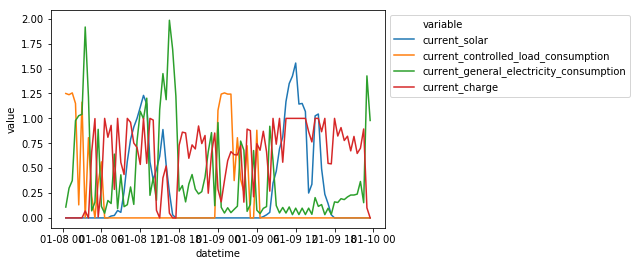

In [32]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_general_electricity_consumption", "current_controlled_load_consumption","current_solar"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-10"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)